In [72]:
library(dplyr)
library(tidyverse)
library(ggplot2)
library(RColorBrewer)
library(cowplot)

In [73]:
df <- read_csv('../data/supermarket_sales_clean.csv')

# wrangling into factors so that we can change the order in graphs
df <- mutate_at(df, vars(`Branch`, `City`, `Gender`, `Customer type`, `Product line`, 
                         `Day_of_week`, `Time_of_day`), as.factor)

df$Day_of_week <- df$Day_of_week %>%
    fct_relevel("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")

df$Time_of_day <- df$Time_of_day %>%
    fct_relevel("Evening", "Afternoon", "Morning")

Parsed with column specification:
cols(
  Date_time = col_datetime(format = ""),
  `Invoice ID` = col_character(),
  Branch = col_character(),
  City = col_character(),
  `Customer type` = col_character(),
  Gender = col_character(),
  `Product line` = col_character(),
  `Unit price` = col_double(),
  Quantity = col_double(),
  `Tax 5%` = col_double(),
  Total = col_double(),
  Payment = col_character(),
  cogs = col_double(),
  `gross margin percentage` = col_double(),
  `gross income` = col_double(),
  Rating = col_double(),
  Day_of_week = col_character(),
  Time_of_day = col_character()
)


In [74]:
options(repr.plot.width=8, repr.plot.height=4)

In [75]:
make_heat_map <- function(branch, title, col_title, func) {
    df %>%
        filter(Branch == branch) %>%
        group_by(Day_of_week, Time_of_day) %>%
        summarize(col_title = {{func}}) %>%
        ggplot(aes(x = Day_of_week, y = Time_of_day, fill = col_title)) +
            geom_tile() +
            scale_fill_distiller(palette = "Greens", direction = 1) +
            ggtitle(title) +
            labs(x = "", y = "", fill = "")
}

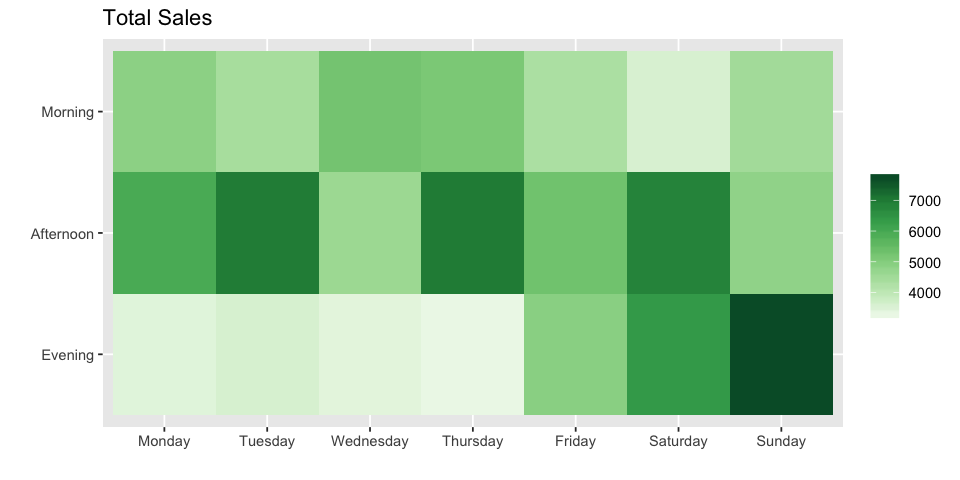

In [76]:
# total sales
make_heat_map("A", "Total Sales", total_sales, sum(Total))

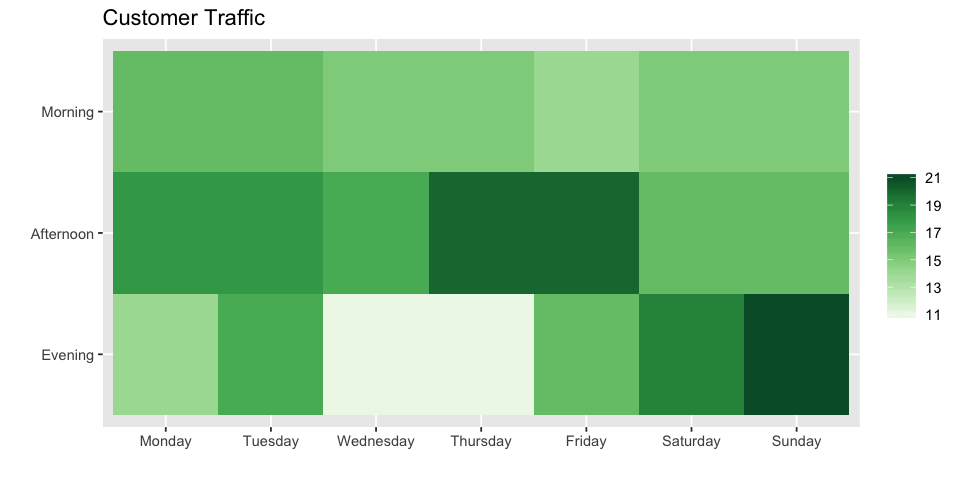

In [77]:
# customer traffic
make_heat_map("A", "Customer Traffic", traffic, n())

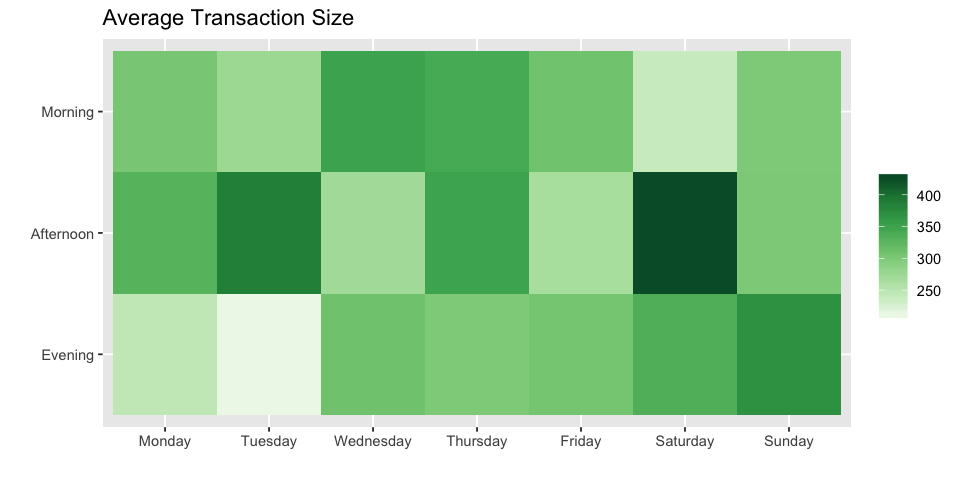

In [78]:
# avg transaction size
make_heat_map("A", "Average Transaction Size", trxn_size, sum(Total) / n())

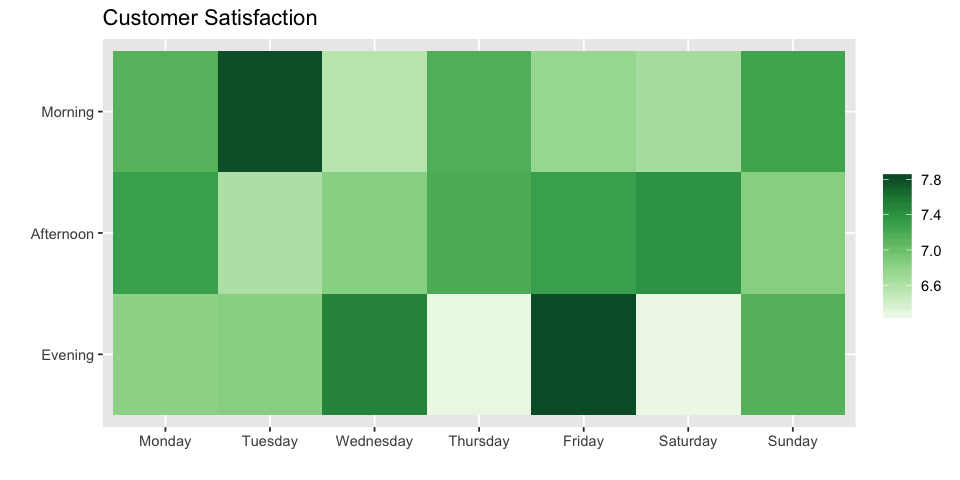

In [80]:
# avg customer satisfaction
make_heat_map("A", "Customer Satisfaction", cust_sat, mean(Rating))

In [308]:
make_bar_plot <- function(DayofWeek, TimeofDay, branch, func, plot_title, y_title){
    options(repr.plot.width = 12, repr.plot.height = 8) 
    df %>%
        filter(Branch == branch & Day_of_week == DayofWeek & Time_of_day == TimeofDay) %>%
        group_by(`Product line`) %>%
        summarise(y_title = {{func}}) %>%
        ggplot(aes(x = `Product line`, y = y_title, color = `Product line`, fill = `Product line`)) +
            geom_bar(stat = "identity", alpha = 0.8) +
            theme_bw() +
            theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), 
                 axis.text.x=element_blank(), axis.ticks.x=element_blank(), axis.title.x=element_blank()) +
            labs(title = plot_title, y = y_title) 
}

In [309]:
# Define arguments
DayofWeek = "Monday"
TimeofDay = "Morning"
branch = "A"

In [310]:
# plot all bar plots 
con_bar_plot <- function(DayofWeek, TimeofDay, branch){
    bar_plot_sales <- make_bar_plot(DayofWeek, TimeofDay, branch, sum(Total), 'Total Sales', 'Sales in MMK')
    bar_plot_traffic <- make_bar_plot(DayofWeek,TimeofDay, branch, n(), 'Customer Traffic', 'Transactions')
    bar_plot_trans <- make_bar_plot(DayofWeek, TimeofDay, branch, mean(Total), 'Average Transaction Size', 'Sales in MMK')
    bar_plot_rating <- make_bar_plot(DayofWeek, TimeofDay, branch, mean(Rating), 'Average Satisfaction', 'Rating')
    figure <- plot_grid(bar_plot_sales, bar_plot_traffic, bar_plot_trans, bar_plot_rating,
                    ncol = 2, nrow = 2)
    return(figure)
}

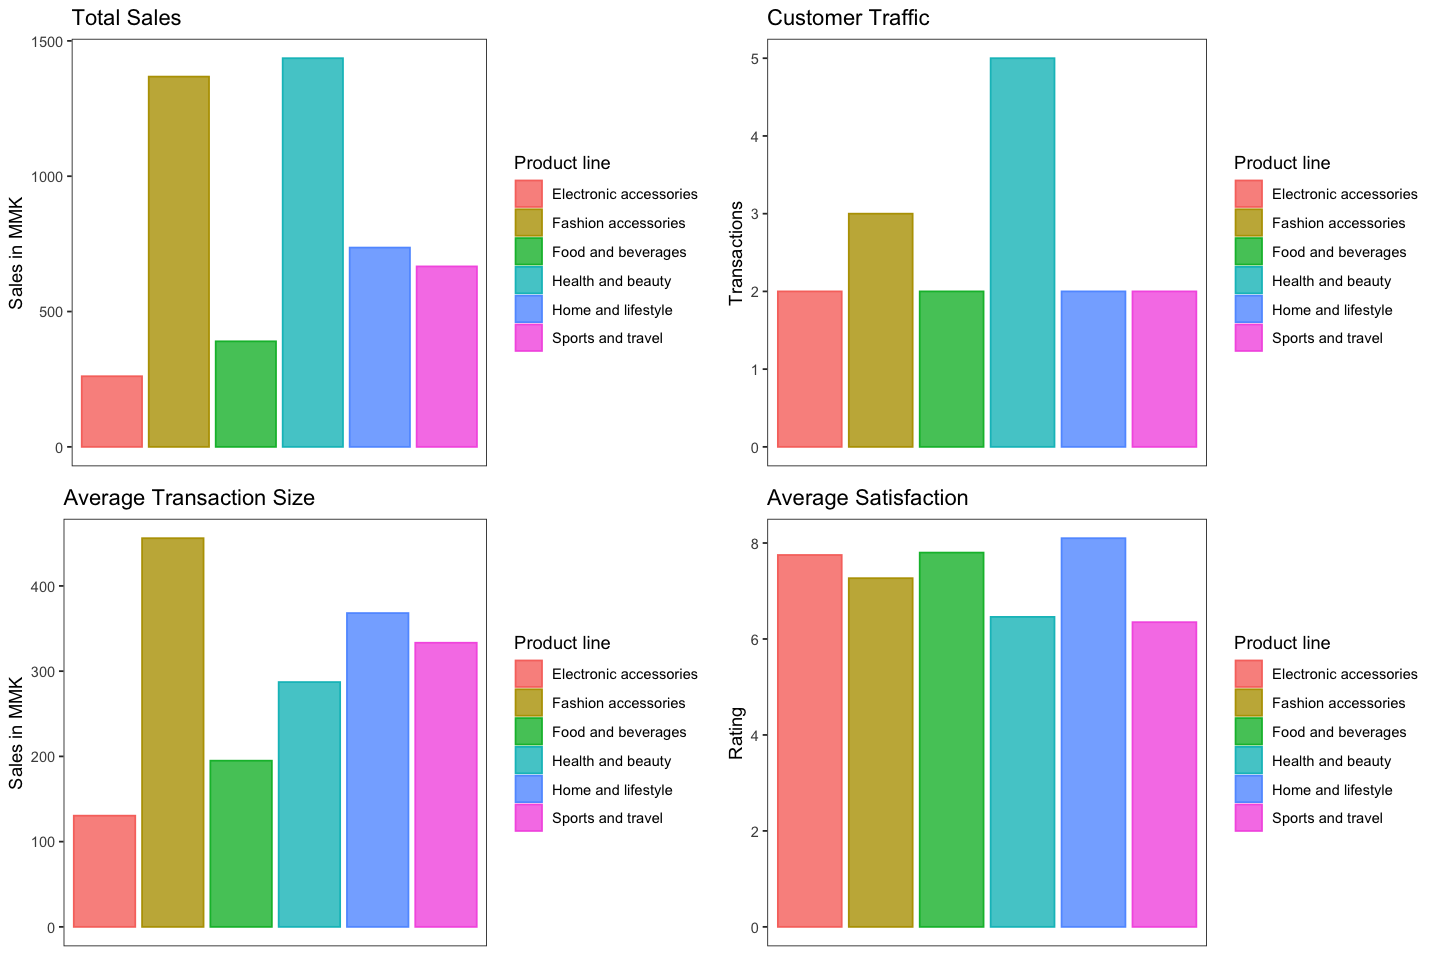

In [311]:
con_bar_plot(DayofWeek, TimeofDay, branch)